In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み

まずは51 Peg（最初に系外惑星が見つかった太陽に似た恒星）の視線速度データ 51Peg_rv.csv を読み込んでみよう（RVは視線速度Radial Velocityの略）。[教材4-1](https://utokyo-ipp.github.io/4/4-1.html)のような方法もあるが、ここでは pandas というパッケージを使う。

In [2]:
import pandas as pd

read_csv は、カンマ（,）記号で区切られたCSV（Comma Separated Value）形式のデータを読み込む関数である。comment="#"は、#から始まる行はコメントとして無視することを指示している（ファイルを直接開いて見てみよう）。さらに引数に delimiter="|" などと指定すれば、カンマ以外で区切られたデータ（この例では|）も同様に読めて便利である。

In [ ]:
data = pd.read_csv("51Peg_rv.txt", comment="#")

In [4]:
data

,BJD,RV,e_RV,Set
0,2.449611e+06,-33258.0,9.0,ELODIE
1,2.449612e+06,-33225.0,9.0,ELODIE
2,2.449655e+06,-33272.0,7.0,ELODIE
3,2.449728e+06,-33310.0,7.0,ELODIE
4,2.449729e+06,-33248.0,7.0,ELODIE
...,...,...,...,...
148,2.452612e+06,-33266.0,8.0,ELODIE
149,2.452834e+06,-33315.0,7.0,ELODIE
150,2.452853e+06,-33196.0,7.0,ELODIE
151,2.452859e+06,-33300.0,8.0,ELODIE


最初の行はヘッダーとして扱われ、列の名前になる。辞書（[教材3-1](https://utokyo-ipp.github.io/3/3-1.html)）と同様に、列の名前をキーとしてデータを参照できる。例えば

In [5]:
data["BJD"]

0      2.449611e+06
1      2.449612e+06
2      2.449655e+06
3      2.449728e+06
4      2.449729e+06
           ...     
148    2.452612e+06
149    2.452834e+06
150    2.452853e+06
151    2.452859e+06
152    2.452888e+06
Name: BJD, Length: 153, dtype: float64

でBJDの列が取り出される。BJDは重心ユリウス日と呼ばれる量で、要するに時間をある時刻から日（day）の単位で示したものである。ここでは視線速度と時間の関係を知りたいので、BJDとRVを配列として取り出しておく。

In [6]:
x = np.array(data["BJD"])
y = np.array(data["RV"])

Matplotlibでプロットしてみよう。

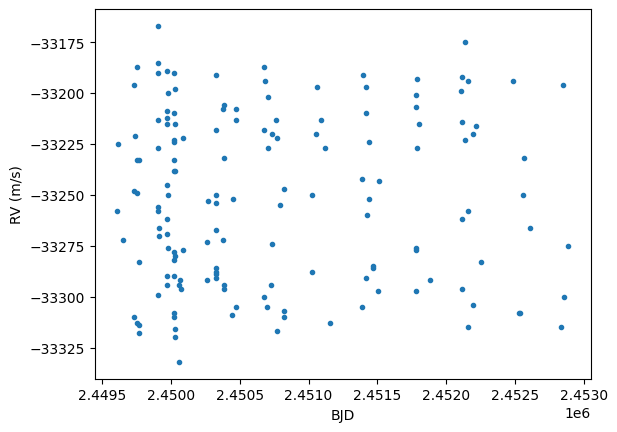

In [7]:
plt.xlabel("BJD")
plt.ylabel("RV (m/s)")
plt.plot(x, y, ".");

デフォルトだとラベルとかに日本語が使えないが、japanize_matplotlib というパッケージをインポートすると使えるようになる。japanize_matplotlib はデフォルトではColabにインストールされていないようなので、!pip install japanize_matplotlib でまずインストールする。他のパッケージも同様にインストールできるので、colab に入っていないものが必要な時はそうする。

In [8]:
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3d12a0d2d471113b73e2f44a8ccf6d512589852be033a0aeaa1dbf2d79ec96ee
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


これで日本語が使えるようになった。ついでにBJDの値が大きすぎて見づらいので、最初の時刻からの差として定義しなおそう。つまり

In [9]:
t = x - x[0] # xの全要素から0番目x[0]を引いたものをtとする

をxの代わりに用いる。

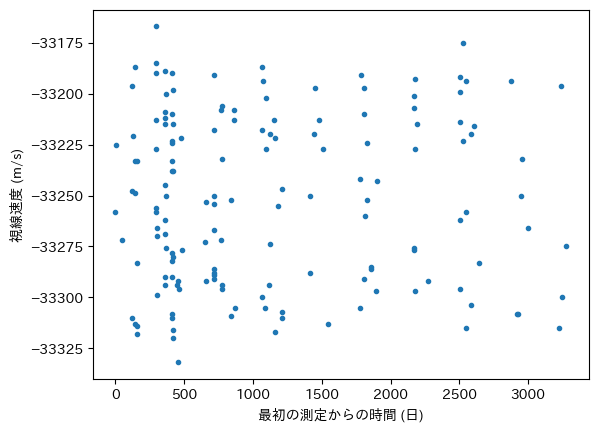

In [10]:
plt.xlabel("最初の測定からの時間 (日)")
plt.ylabel("視線速度 (m/s)")
plt.plot(t, y, ".");

# 周期変動を確かめる

上のプロットだけ見ていても何かばらついていることしかわからない。[Birkby et al. (2017)](https://iopscience.iop.org/article/10.3847/1538-3881/aa5c87) によると、51 Pegを公転する惑星の周期は 4.230787日である。ここではこの周期を既知とし、上の視線速度データが一定の周期で変動していることを確かめてみよう。

In [11]:
period = 4.230787 # 公転周期（日）

もし視線速度（ここでは配列$y$）が上の period $P$で周期的に変化していれば、ある時刻$t=t_0$における$y$の値と、時刻$t=t_0+P, t_0+2P, t_0+3P, \dots$における$y$の値は全て同じはずである。すなわち、$y$は$t$を$P$で割った余りのみに依存するはずである。これを視覚的に確かめてみよう。

## 課題
$t$を$P$で割った余りを横軸、$y$を縦軸としてデータをプロットしてみよう。軸のラベルも適切に記入すること。

In [12]:
t_amari = t % period # 変数の名前は自分で勝手に決めてよい（他の変数と区別がつきやすく、後で見て意味がすぐわかるようにしておくとよい）

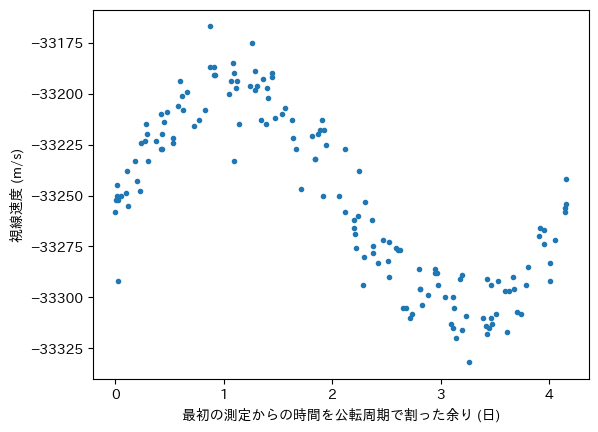

In [13]:
plt.xlabel("最初の測定からの時間を公転周期で割った余り (日)")
plt.ylabel("視線速度 (m/s)")
plt.plot(t_amari, y, ".");

## 課題
1. 「$t$を$P$で割った余り」をさらに$P$で割ったものを軌道の位相（phase）という。定義から位相は0から1の実数である。位相$\phi$を計算し、$y$を縦軸、$\phi$を横軸としてデータを再度プロットしてみよう。x軸の範囲は0から1に指定してみよう。
2.  周期が1のサイン関数（を定数倍し、さらに定数を加えたもの）をデータ上にプロットし、振幅や定数を調整してデータと近くなるか試してみよう（大体で良い）。

In [14]:
phase = t_amari / period

In [15]:
# サイン関数のプロット用に配列を定義
# lecture8-1.ipynb を参照
x = np.linspace(0, 1, 1000)

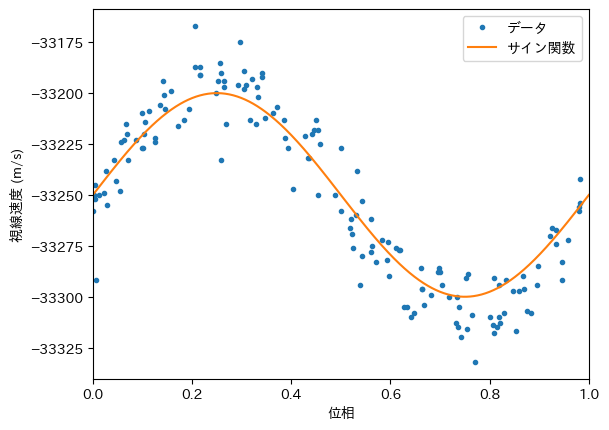

In [16]:
plt.xlabel("位相")
plt.ylabel("視線速度 (m/s)")
plt.xlim(0, 1) # x軸の範囲を指定
plt.plot(phase, y, ".", label="データ")
plt.plot(x, 50 * np.sin(2*np.pi*x) - 33250, label="サイン関数")
plt.legend(loc="best") #　凡例を表示

振幅 50m/s はy方向の変動の幅から、定数 -33250 はy方向の中心から決めた。sin()の中身は、周期が$P$のとき$2\pi x/P$となることに注意。今は横軸を位相にとっているので周期は1である。

余裕があればさらに以下もやってみよう。
1. サイン関数の振幅$K$, 加えた定数$g$を引数とし、データとの差の二乗和
$$
    L = \sum_{i=1}^N \left\{y_i - \left[K\sin(2\pi \phi_i) + g\right]\right\}^2
$$
を返す関数 objective を作成しよう。
2. 上の課題で大体求めた$K$と$g$の周辺で、[for文](https://utokyo-ipp.github.io/3/3-2.html)を用いて$L(K,g)$を計算し、$L$が最小になる$(K, g)$を探してみよう。
3. さらに余裕があれば、$K$から惑星の質量についてどのような情報が得られるか考察してみよう。恒星51Pegの質量は太陽の約1.1倍である。太陽質量は有効数字3桁で$1.99\times 10^{30}\,\mathrm{kg}$, 木星の質量は$1.90\times10^{27}\,\mathrm{kg}$, 万有引力定数は$G=6.67\times10^{-11}\,\mathrm{m^3/kg/s^2}$である。

objectiveは以下のように作成できる。

In [17]:
def objective(K, g):
    y_model = K * np.sin(2*np.pi*phase) + g # データのphaseでのyの値
    L = np.sum((y-y_model)**2)
    return L

ここではKを30から70まで、gを-33270から-33230まで等間隔に200ずつ値をとり、200 x 200 = 40000組の(K,g)についてしらみ潰しにLを計算する。このような方法をグリッドサーチ（grid search）という。パラメータ（変数）の数が増えると極めて効率が悪い。

In [18]:
K_values = np.linspace(30, 70, 200)
g_values = np.linspace(-33250-20, -33250+20, 200)
results = []
for K in K_values:
    for g in g_values:
        results.append([K, g, objective(K, g)]) # 後で便利なように、LだけでなくK,gの値もresultsに格納
results = np.array(results)

resultsの中身がわからなくなったら形を見てみよう。

In [19]:
np.shape(results)

(40000, 3)

40000 は (K,g) の組の数、3はK, g, Lに対応するはずである。

In [20]:
results[0]

array([ 3.00000000e+01, -3.32700000e+04,  1.25795481e+05])

$L$が最小になるパラメータの組を求めたい。つまり、40000行のうち、$L$が最小なのは何行目か（行のindex）を知りたい。これにはNumPyのargminという関数が使える。この関数は、配列が最小になる値のindexを返す。

In [21]:
index_min = np.argmin(results[:,2])

ここでは results[:,2] で$L$の配列を取り出している。results[:,0]なら$K$の値, results[:,1]なら$g$の値になる。
よって$L$を最小にする$K$, $g$と、対応するグラフは以下のようになる。

In [22]:
best_params = results[index_min]

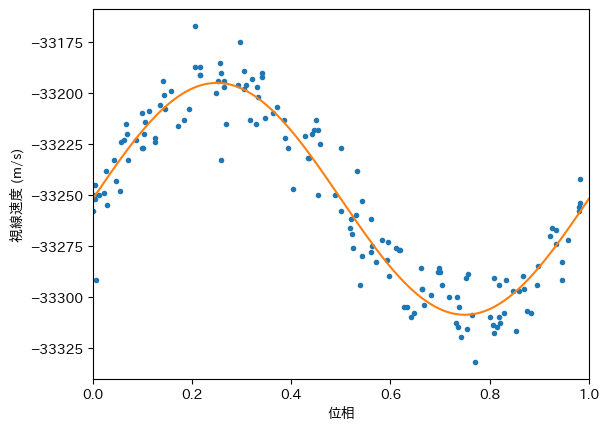

In [23]:
plt.xlabel("位相")
plt.ylabel("視線速度 (m/s)")
plt.xlim(0, 1)
plt.plot(phase, y, '.')
plt.plot(x, best_params[0] * np.sin(2*np.pi*x) + best_params[1]);

ちなみに$L$を$K$と$g$の各々に対してプロットすると以下のようになる。

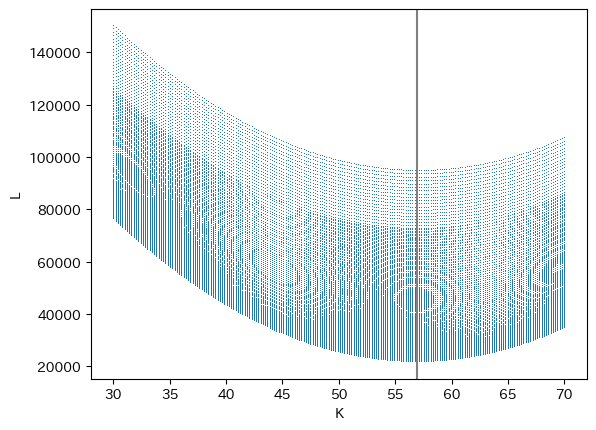

In [24]:
plt.xlabel("K")
plt.ylabel("L")
plt.plot(results[:,0], results[:,2], ',')
plt.axvline(x=best_params[0], color="gray");

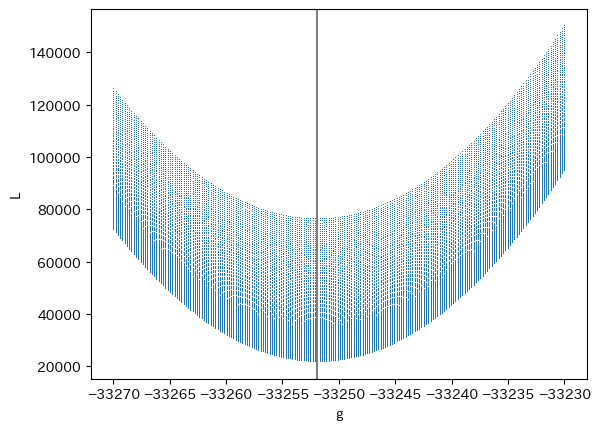

In [25]:
plt.xlabel("g")
plt.ylabel("L")
plt.plot(results[:,1], results[:,2], ',')
plt.axvline(x=best_params[1], color="gray");

pyplot.axvline() はx軸に垂直（ax"v"lineのvはverticalの頭文字）な直線を引く関数である。これを用いてグリッドサーチの最適解の位置を示した。

補足: ちなみにここでは位相phaseやt_amariを計算する際、単に時間を$P$で割った。その結果、位相0はほぼ"正しい"位置（視線速度の時間変化が正で最大の位置）に来たが、これはたまたまである。一般には、位相0（以外の値でもよい）に対応する時刻t0も最適化する必要がある。